In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tmdb-movies-dataset/tmdb_movies_data.csv


EDA

In [2]:
df = pd.read_csv('/kaggle/input/tmdb-movies-dataset/tmdb_movies_data.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [3]:
df = pd.read_csv('/kaggle/input/tmdb-movies-dataset/tmdb_movies_data.csv')
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Cleaning data

In [4]:
df.drop(columns = ['id','imdb_id','release_date','homepage','tagline','keywords','overview','budget_adj','revenue_adj'],inplace=True)
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10866 non-null  float64
 1   budget                10866 non-null  int64  
 2   revenue               10866 non-null  int64  
 3   original_title        10866 non-null  object 
 4   cast                  10790 non-null  object 
 5   director              10822 non-null  object 
 6   runtime               10866 non-null  int64  
 7   genres                10843 non-null  object 
 8   production_companies  9836 non-null   object 
 9   vote_count            10866 non-null  int64  
 10  vote_average          10866 non-null  float64
 11  release_year          10866 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 1018.8+ KB


In [6]:
df[df['budget'] == 0] = df.budget.mean()
df[df['revenue'] == 0] = df.revenue.mean()

In [7]:
df = df[df['budget']>1000]
df = df[df['revenue']>1000]
df = df[df.release_year<=2015]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3820 entries, 0 to 10848
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            3820 non-null   float64
 1   budget                3820 non-null   float64
 2   revenue               3820 non-null   float64
 3   original_title        3820 non-null   object 
 4   cast                  3816 non-null   object 
 5   director              3819 non-null   object 
 6   runtime               3820 non-null   float64
 7   genres                3820 non-null   object 
 8   production_companies  3776 non-null   object 
 9   vote_count            3820 non-null   float64
 10  vote_average          3820 non-null   float64
 11  release_year          3820 non-null   float64
dtypes: float64(7), object(5)
memory usage: 388.0+ KB


In [8]:
df.isna().sum()

popularity               0
budget                   0
revenue                  0
original_title           0
cast                     4
director                 1
runtime                  0
genres                   0
production_companies    44
vote_count               0
vote_average             0
release_year             0
dtype: int64

Adding the net percentage profit per movie column

In [9]:
df['net_profit_percentage'] = (df.revenue-df.budget)/df.budget

Adding status move column to detect if the movie had succeeded or failed

In [10]:
df['status'] = np.where(df['budget']>= df['revenue'], 'failed', 'successful')

Grouping the data by year to explore some statistics and visualizing the results

In [11]:
df_grouped_years_1960_2015 = df.groupby(['release_year'],as_index=False)[['popularity','vote_count','vote_average','runtime','budget','revenue','net_profit_percentage']].mean()

Are old movies more popular or modern movies?
We found that:
1-The modern movies are more popular than the old movies
2-The modern movies have voters more than the old movies
3-The old movies have a higher rateing points than the modern movies
4-The old movies have a higher net profit percentage particularly between 1970 to 1980 more than the modern movies
5-After comparing the number of the successful movies and the failed movies, we saw that the number of the successful movies are approximately equal to 2.5 times the number of the failed movies (4:1)
6-The old movies were longer than the modern movies. Especially between (1960:1970)
7-The comparison between the failed and the successful movies runtime for each year shows us many result like: the failed movies between (1960-1980) was longer than the avarage runtime for the sucssful movies, but after 1980 the failed movies runtime was shorter than the sucessful movies avarage runtime (120 min).

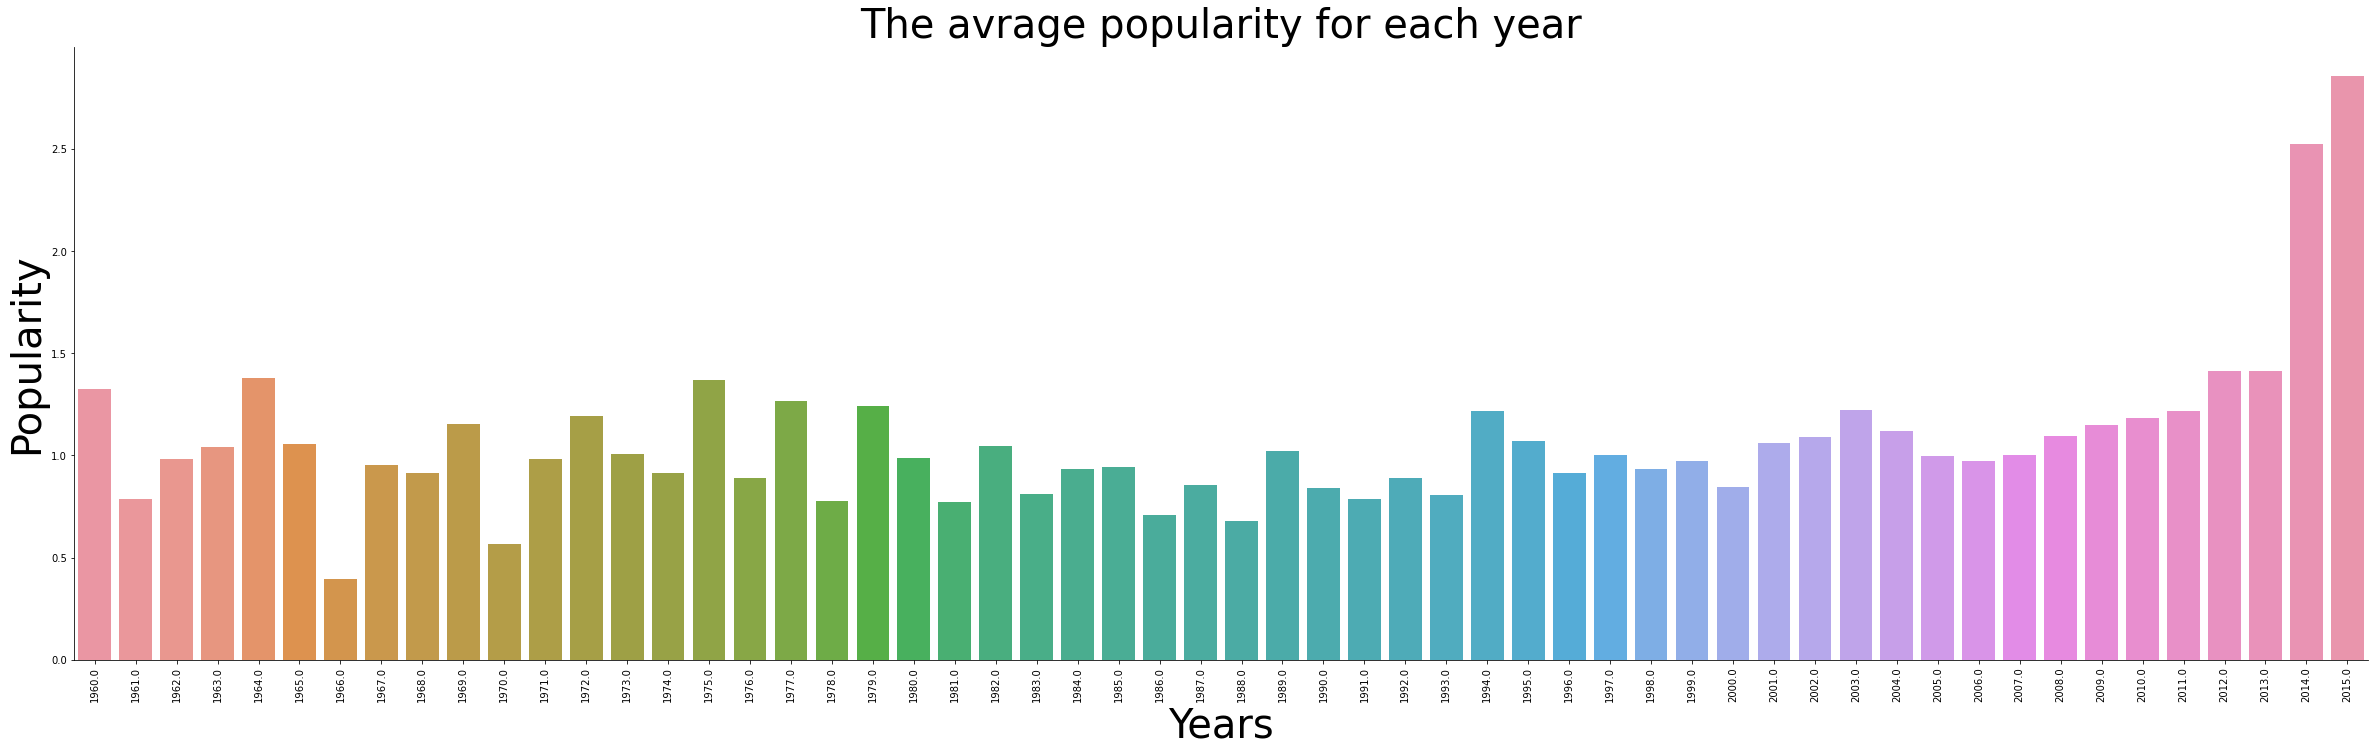

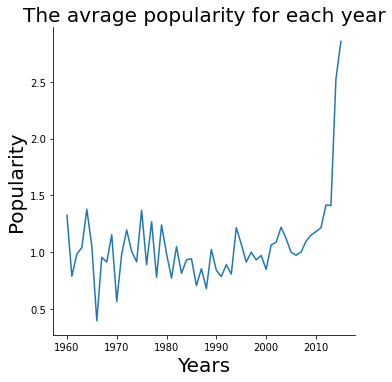

In [12]:
sns.catplot(data=df_grouped_years_1960_2015,x='release_year',y='popularity',kind='bar')
plt.gcf().set_size_inches(40, 10)
plt.title('The avrage popularity for each year',fontsize=40)
plt.xlabel('Years',fontsize=40)
plt.ylabel('Popularity',fontsize=40)
plt.xticks(rotation = 90)
plt.show()
sns.relplot(data=df_grouped_years_1960_2015,x='release_year',y='popularity',kind='line')
plt.title('The avrage popularity for each year',fontsize=20)
plt.xlabel('Years',fontsize=20)
plt.ylabel('Popularity',fontsize=20)
plt.show()

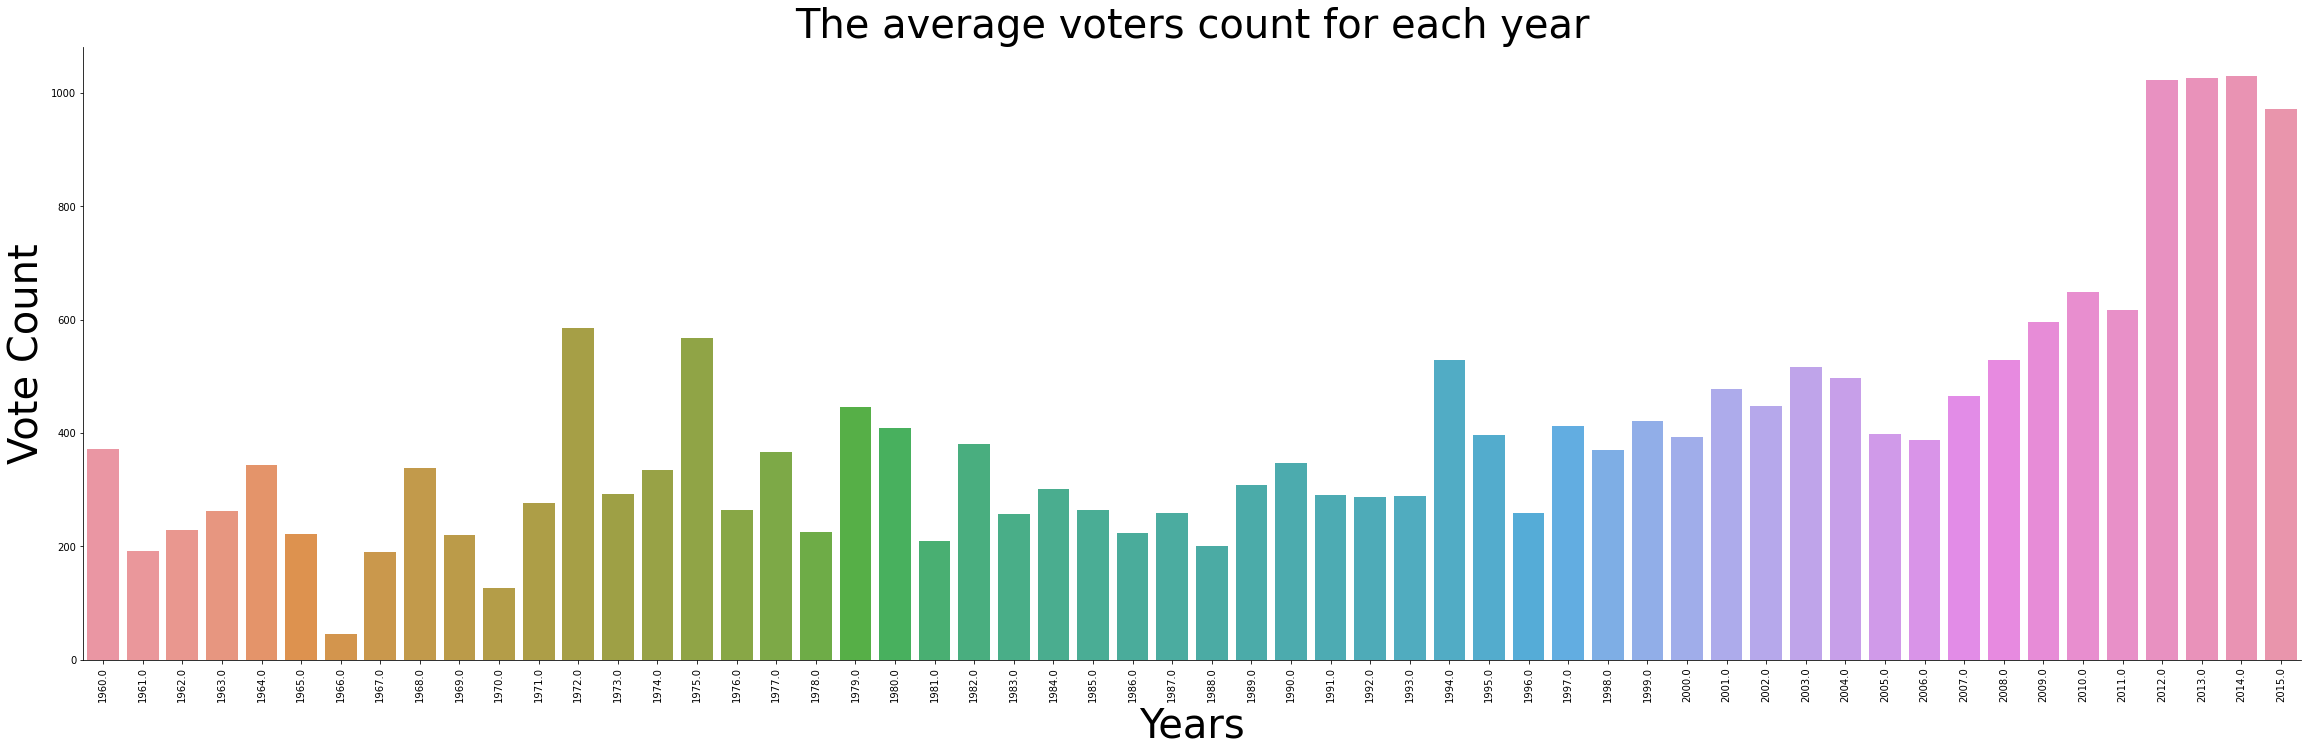

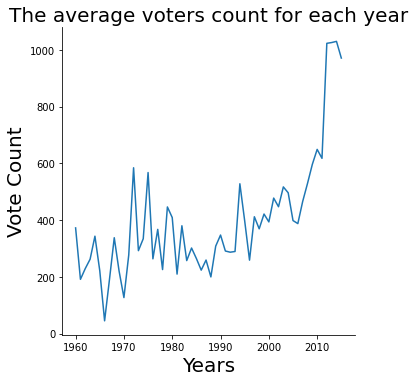

In [13]:
sns.catplot(data=df_grouped_years_1960_2015,x='release_year',y='vote_count',kind='bar')
plt.gcf().set_size_inches(40, 10)
plt.title('The average voters count for each year',fontsize=40)
plt.xlabel('Years',fontsize=40)
plt.ylabel('Vote Count',fontsize=40)
plt.xticks(rotation = 90)
plt.show()
sns.relplot(data=df_grouped_years_1960_2015,x='release_year',y='vote_count',kind='line')
plt.title('The average voters count for each year',fontsize=20)
plt.xlabel('Years',fontsize=20)
plt.ylabel('Vote Count',fontsize=20)
plt.show()

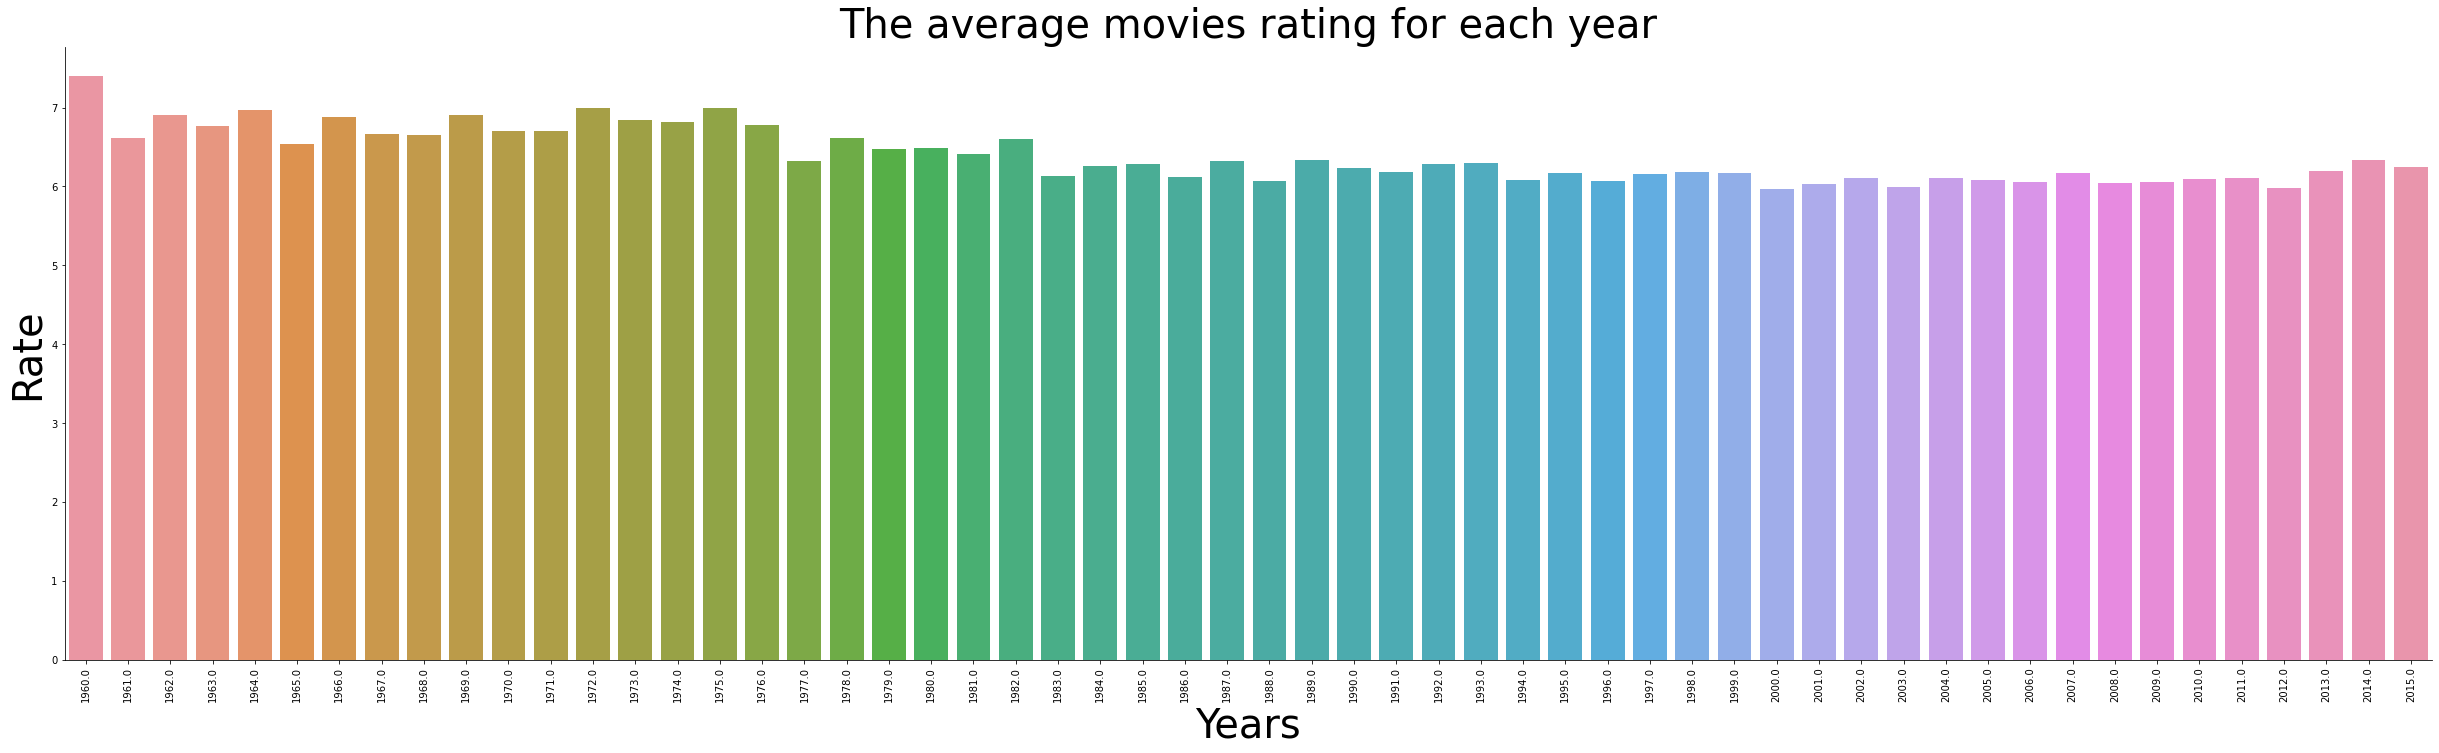

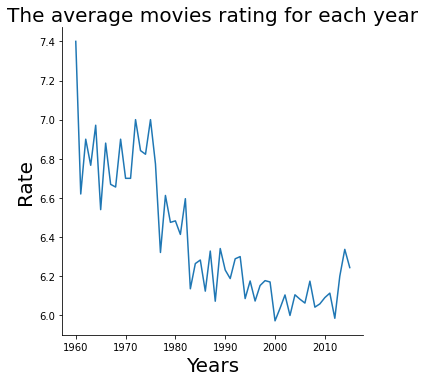

In [14]:
sns.catplot(data=df_grouped_years_1960_2015,x='release_year',y='vote_average',kind='bar')
plt.gcf().set_size_inches(40, 10)
plt.title('The average movies rating for each year',fontsize=40)
plt.xlabel('Years',fontsize=40)
plt.ylabel('Rate',fontsize=40)
plt.xticks(rotation = 90)
plt.show()
sns.relplot(data=df_grouped_years_1960_2015,x='release_year',y='vote_average',kind='line')
plt.title('The average movies rating for each year',fontsize=20)
plt.xlabel('Years',fontsize=20)
plt.ylabel('Rate',fontsize=20)
plt.show()

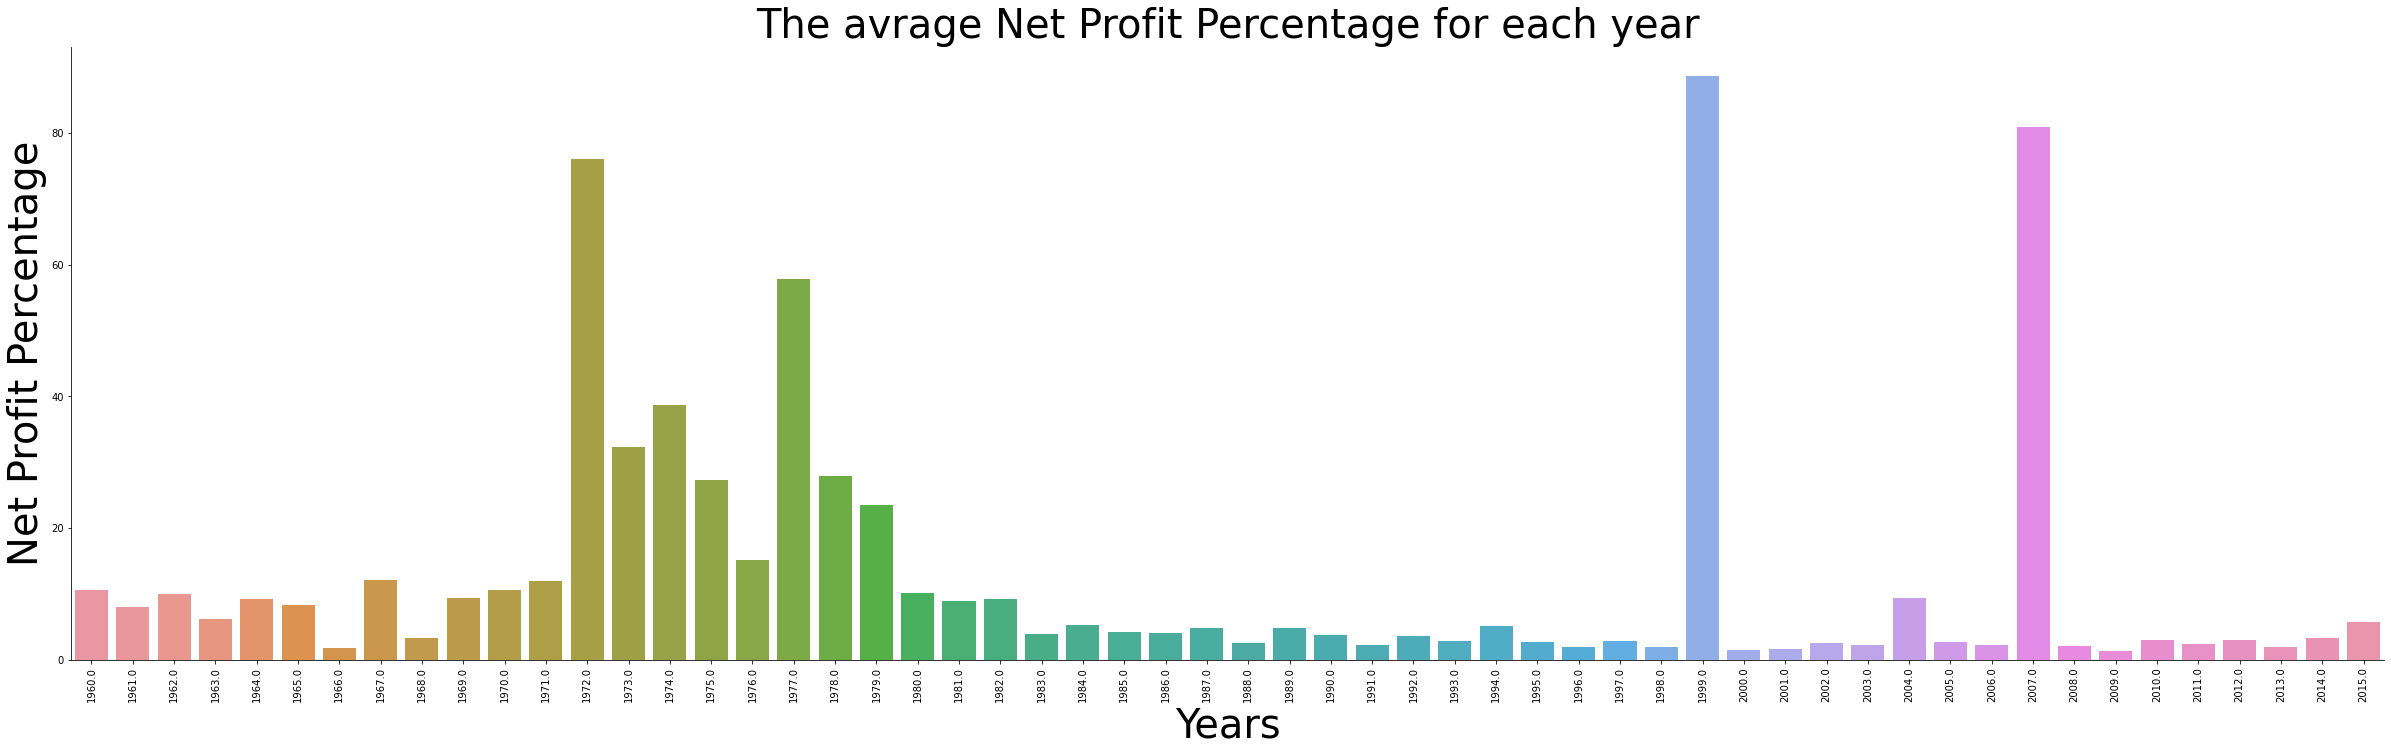

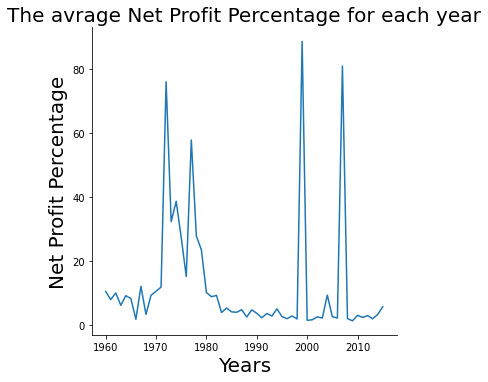

In [15]:
sns.catplot(data=df_grouped_years_1960_2015,x='release_year',y='net_profit_percentage',kind='bar')
plt.gcf().set_size_inches(40, 10)
plt.title('The avrage Net Profit Percentage for each year',fontsize=40)
plt.xlabel('Years',fontsize=40)
plt.ylabel('Net Profit Percentage',fontsize=40)
plt.xticks(rotation = 90)
plt.show()
sns.relplot(data=df_grouped_years_1960_2015,x='release_year',y='net_profit_percentage',kind='line')
plt.title('The avrage Net Profit Percentage for each year',fontsize=20)
plt.xlabel('Years',fontsize=20)
plt.ylabel('Net Profit Percentage',fontsize=20)
plt.show()

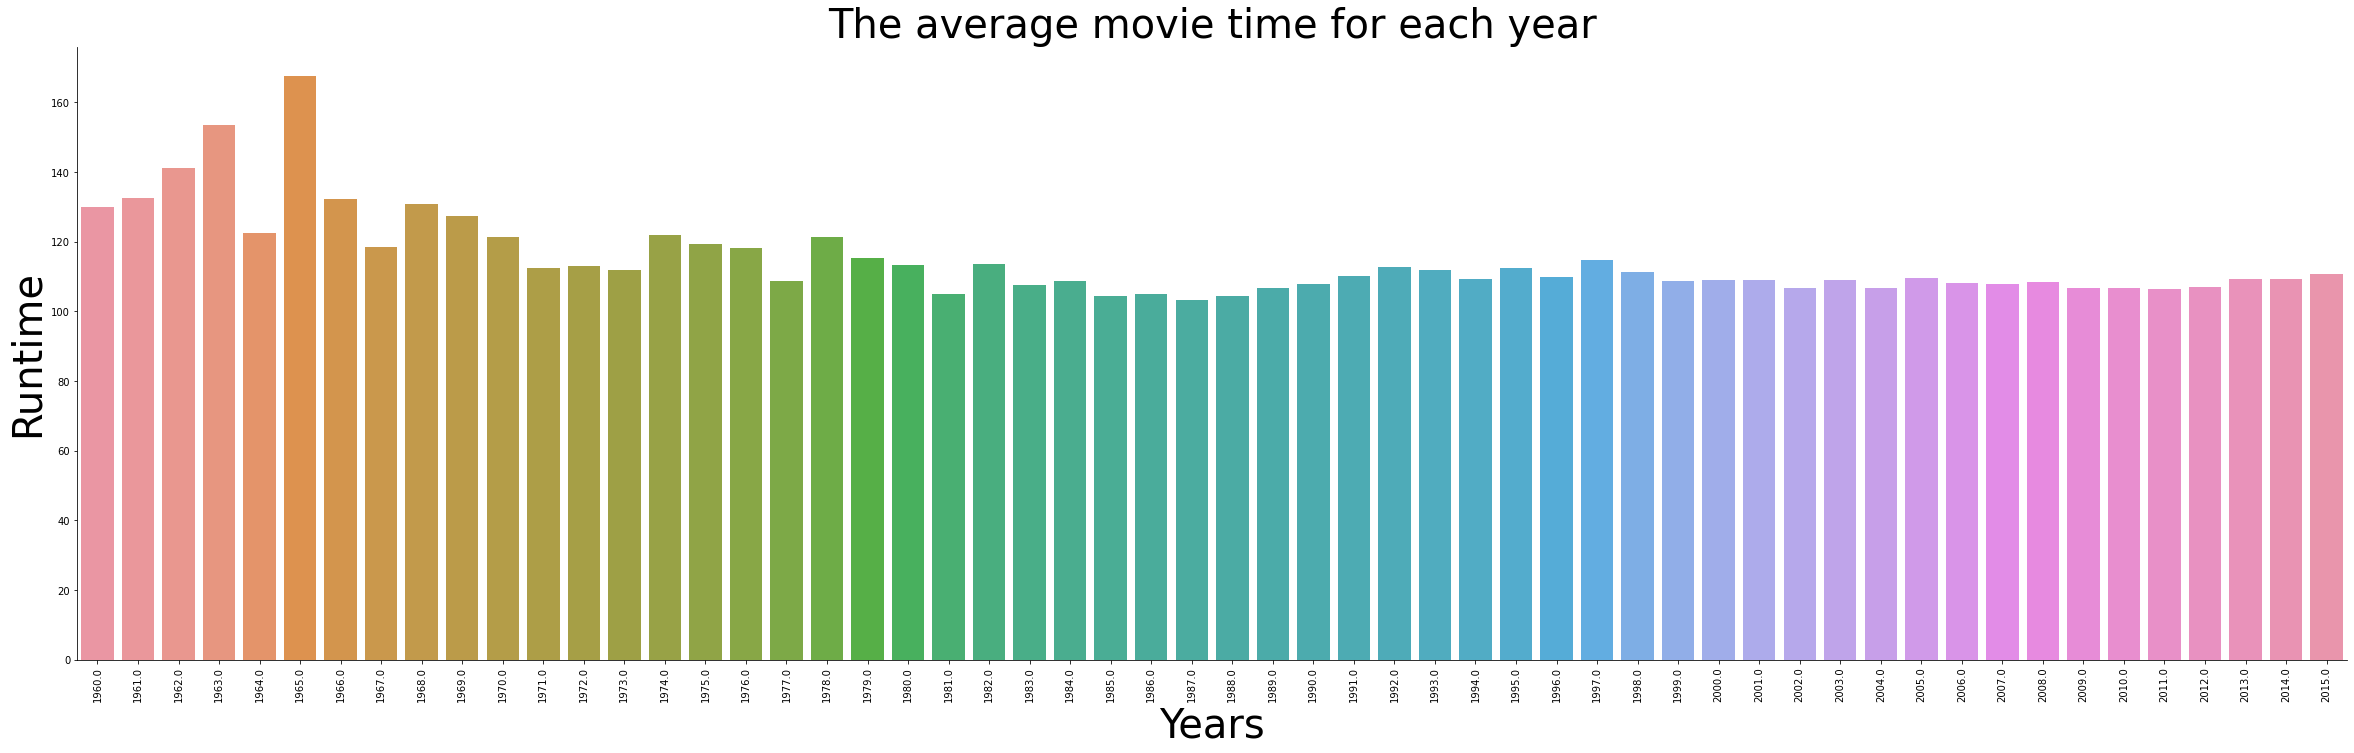

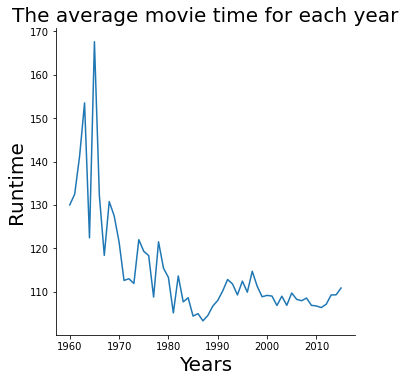

In [16]:
sns.catplot(data=df_grouped_years_1960_2015,x='release_year',y='runtime',kind='bar')
plt.gcf().set_size_inches(40, 10)
plt.title('The average movie time for each year',fontsize=40)
plt.xlabel('Years',fontsize=40)
plt.ylabel('Runtime',fontsize=40)
plt.xticks(rotation = 90)
plt.show()
sns.relplot(data=df_grouped_years_1960_2015,x='release_year',y='runtime',kind='line')
plt.title('The average movie time for each year',fontsize=20)
plt.xlabel('Years',fontsize=20)
plt.ylabel('Runtime',fontsize=20)
plt.show()

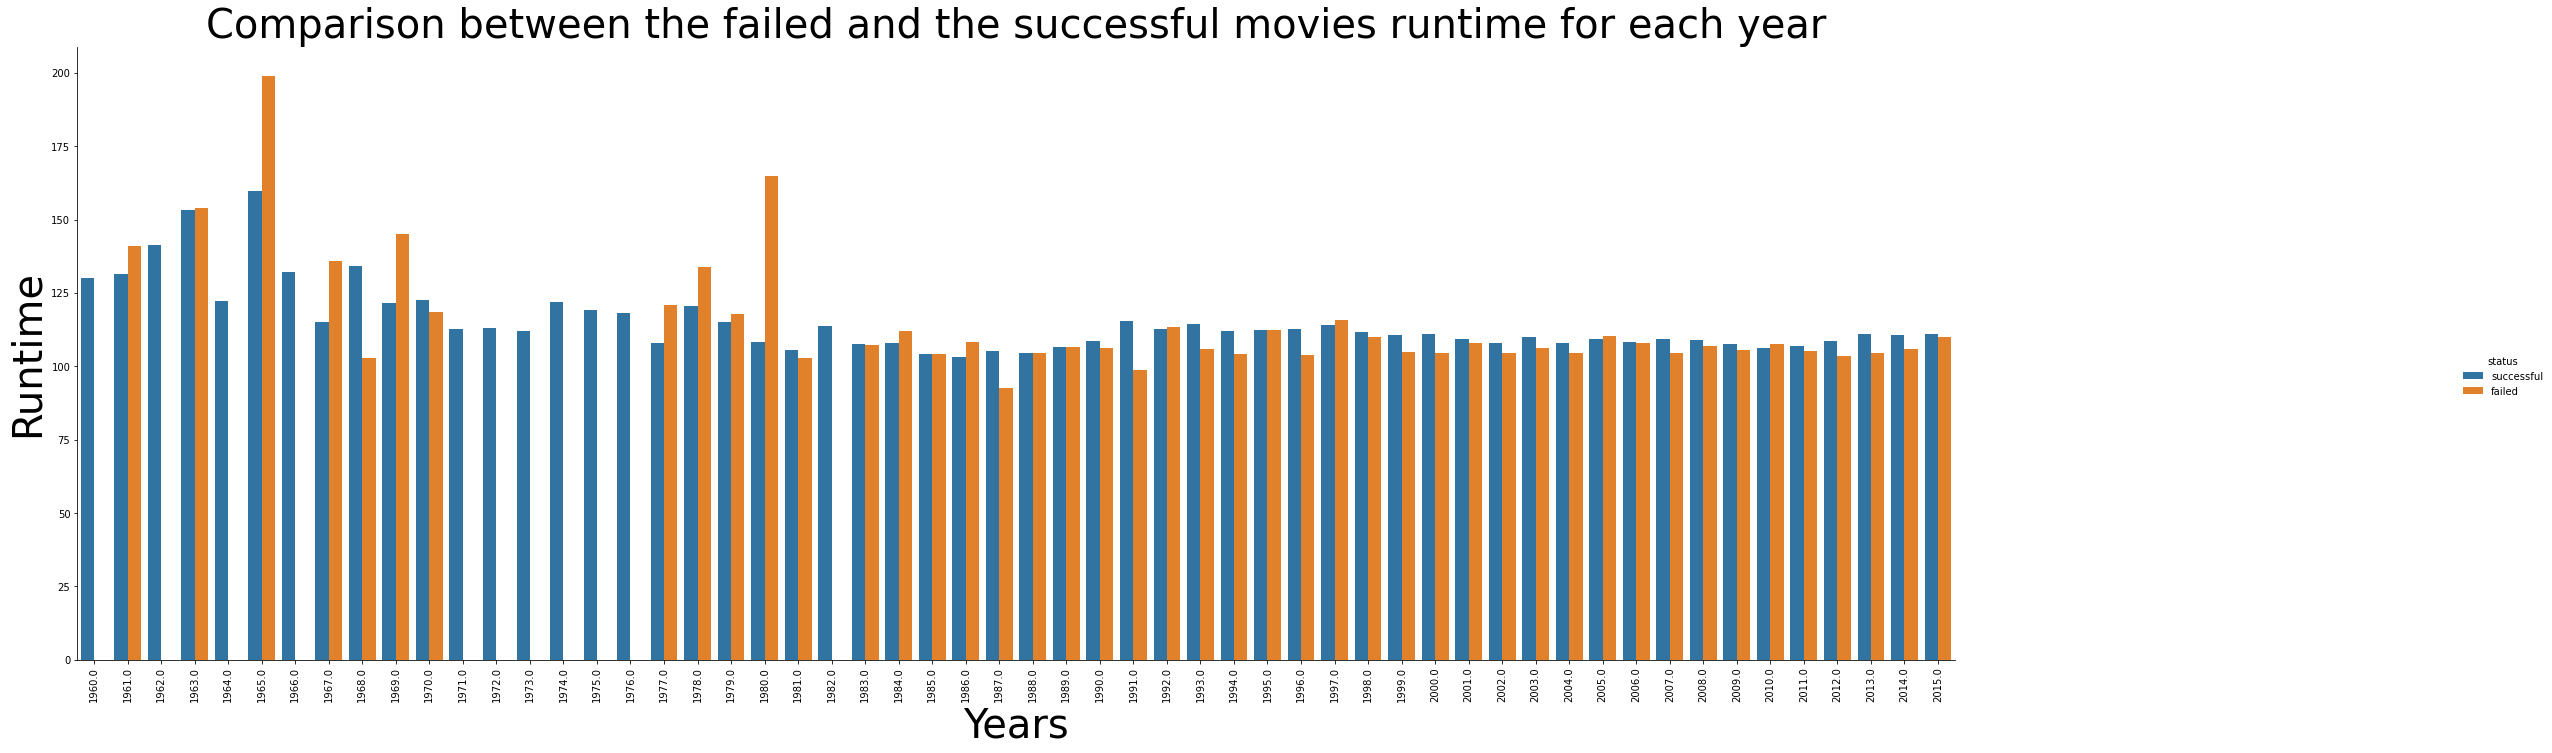

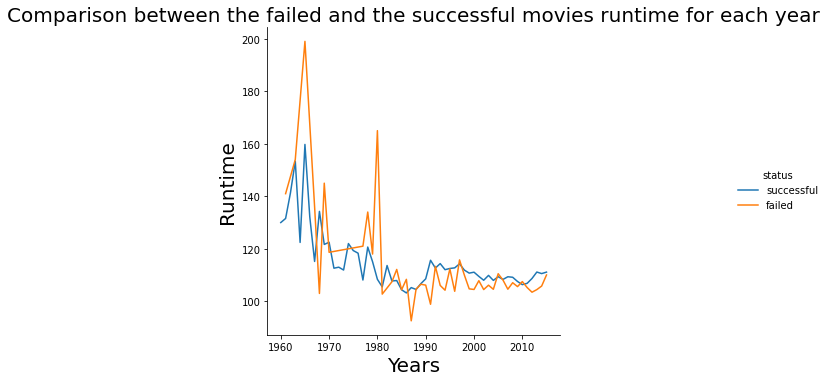

In [17]:
df_grouped_years_status_runtime_mean_1960_2015 = df.groupby(['release_year','status'],as_index=False)['runtime'].mean()
sns.catplot(data=df_grouped_years_status_runtime_mean_1960_2015,x='release_year',y='runtime',hue='status',kind='bar')
plt.gcf().set_size_inches(40, 10)
plt.title('Comparison between the failed and the successful movies runtime for each year',fontsize=40)
plt.xlabel('Years',fontsize=40)
plt.ylabel('Runtime',fontsize=40)
plt.xticks(rotation = 90)
plt.show()
sns.relplot(data=df_grouped_years_status_runtime_mean_1960_2015,x='release_year',y='runtime',hue='status',kind='line')
plt.title('Comparison between the failed and the successful movies runtime for each year',fontsize=20)
plt.xlabel('Years',fontsize=20)
plt.ylabel('Runtime',fontsize=20)
plt.show()

In [18]:
genres = df.iloc[0,:].genres
genres

'Action|Adventure|Science Fiction|Thriller'

In [19]:
def detect_type(string,value):
    if value in string:
        return True
    else:
        return False

df['action'] = df.apply(lambda x: detect_type(x['genres'],'Action'), axis=1)

df.value_counts('action')

action
False    2743
True     1077
dtype: int64

In [20]:
df['Action'] = 'Action' in df.genres
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,net_profit_percentage,status,action,Action
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562.0,6.5,2015.0,9.090192,successful,True,False
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185.0,7.1,2015.0,1.522909,successful,True,False
2,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480.0,6.3,2015.0,1.683984,successful,False,False
3,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292.0,7.5,2015.0,9.340891,successful,True,False
4,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947.0,7.3,2015.0,6.927628,successful,True,False


In [21]:
print('Adventure' in genres)

True


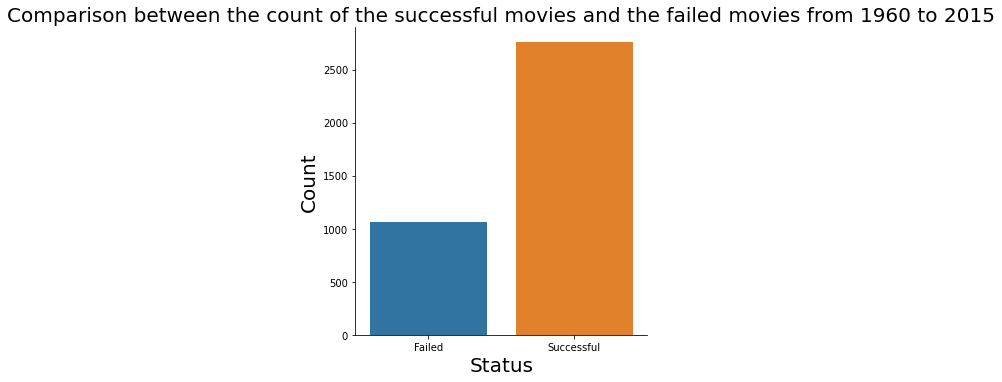

In [22]:
df_failed_movies_count = df[df['status'] == 'failed'].shape[0]
df_successful_movies_count = df[df['status'] == 'successful'].shape[0]
sns.catplot(data=df,kind='bar',x=['Failed','Successful'],y=[df_failed_movies_count,df_successful_movies_count])
plt.title('Comparison between the count of the successful movies and the failed movies from 1960 to 2015',fontsize=20)
plt.xlabel('Status',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.show()

In [23]:
x = df.groupby(['release_year','status'],as_index=False).size()
x.size.sum()

303

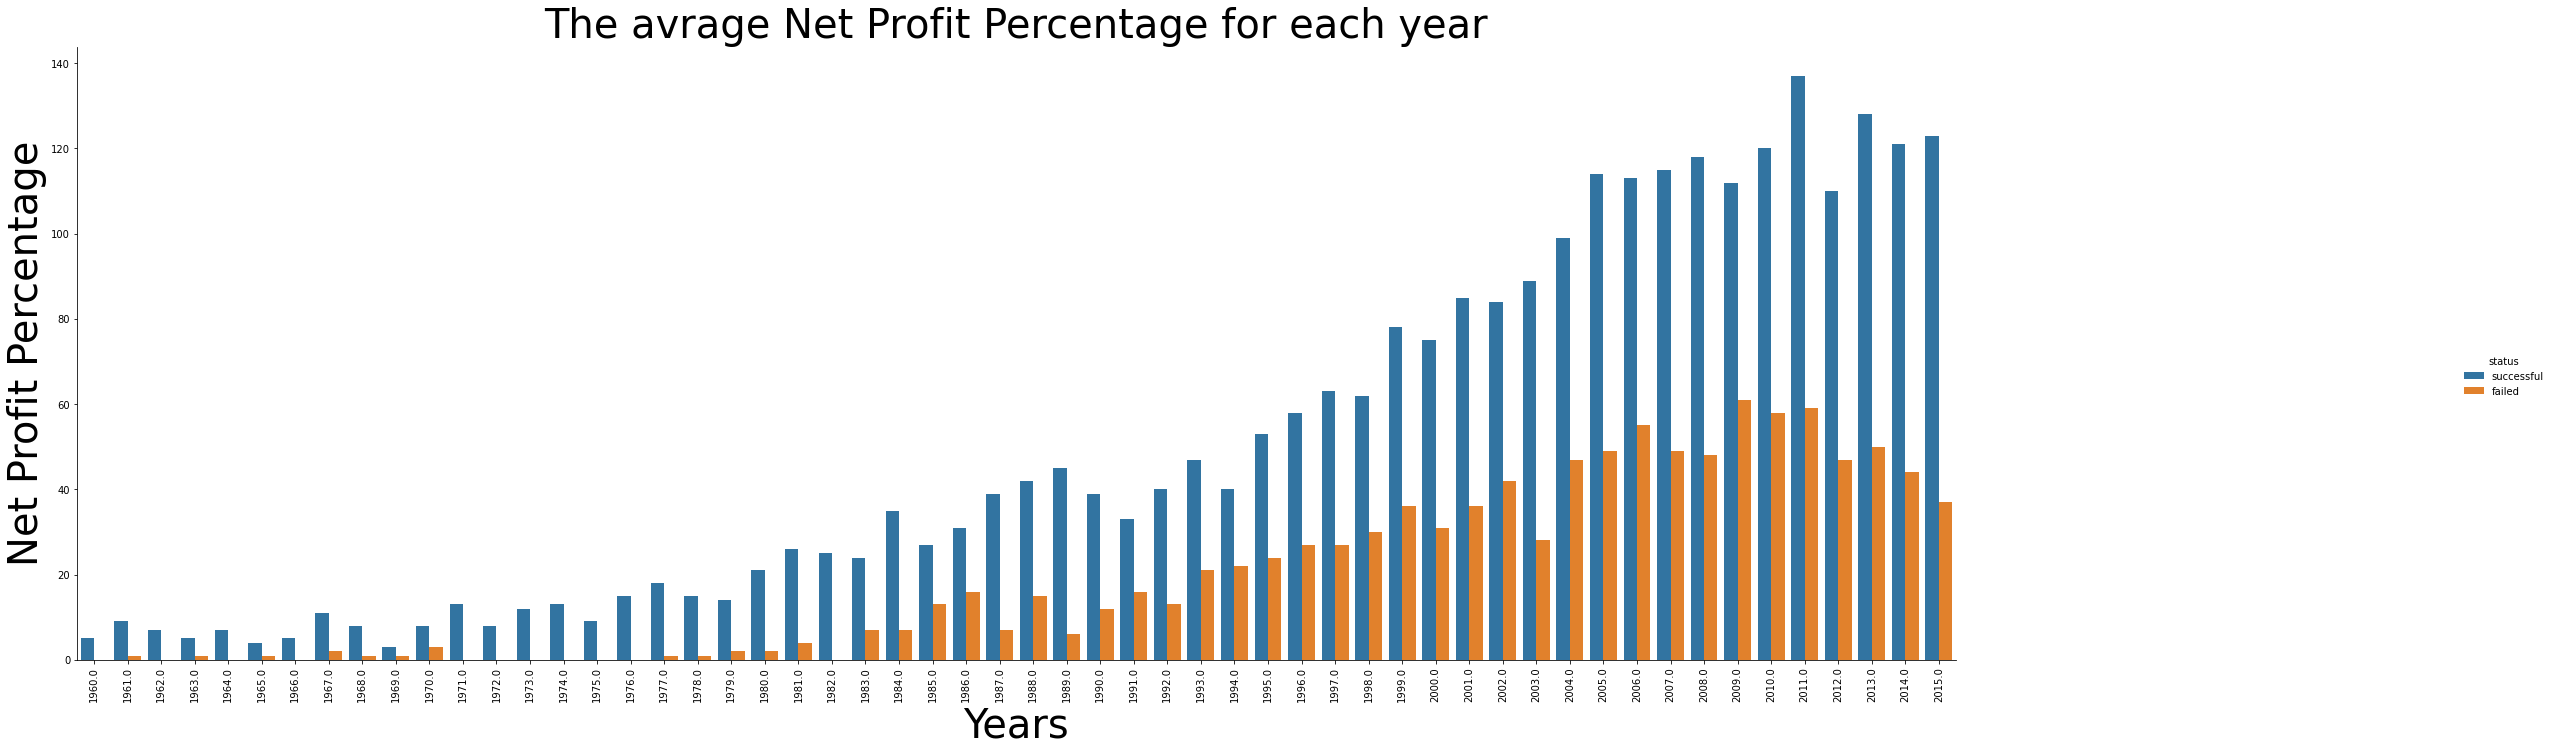

status
successful    2760
failed        1060
dtype: int64

In [24]:
df_grouped_years_status_count_1960_2015 = df.groupby(['release_year','status'],as_index=False).size()
sns.catplot(data=df_grouped_years_status_count_1960_2015,kind='bar',x='release_year',y='size',hue='status')
plt.gcf().set_size_inches(40, 10)
plt.title('The avrage Net Profit Percentage for each year',fontsize=40)
plt.xlabel('Years',fontsize=40)
plt.ylabel('Net Profit Percentage',fontsize=40)
plt.xticks(rotation = 90)
plt.show()
df_grouped_years_status_count_1960_2015.shape
df.value_counts('status')

What is the most famous three movies for every year?

In [25]:
x = df.groupby(['release_year','status'],as_index=False).apply(lambda x: x.value_counts('status'))
x.head(100)
#sns.catplot(data=df,x = 'release_year', y = 'popularity')
#plt.xticks(rotation = 45)
#plt.show()

    status    
0   successful      5
1   failed          1
2   successful      9
3   successful      7
4   failed          1
                 ... 
95  failed         50
96  successful    128
97  failed         44
98  successful    121
99  failed         37
Length: 100, dtype: int64